# Checking GPU availability

In [61]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
else:
    print("Failed to detect a GPU.")

Found a GPU with the name: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [62]:
tf.test.is_built_with_cuda()

True

# Importing required Libraries

In [63]:
#importing libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from ydata_profiling import ProfileReport
import pickle


In [64]:
df=pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

# Preprocessing

In [65]:
df=df.dropna()

In [66]:
df.duplicated().sum()

24206

In [67]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [68]:
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [69]:
import seaborn as sn
import matplotlib.pyplot as plt

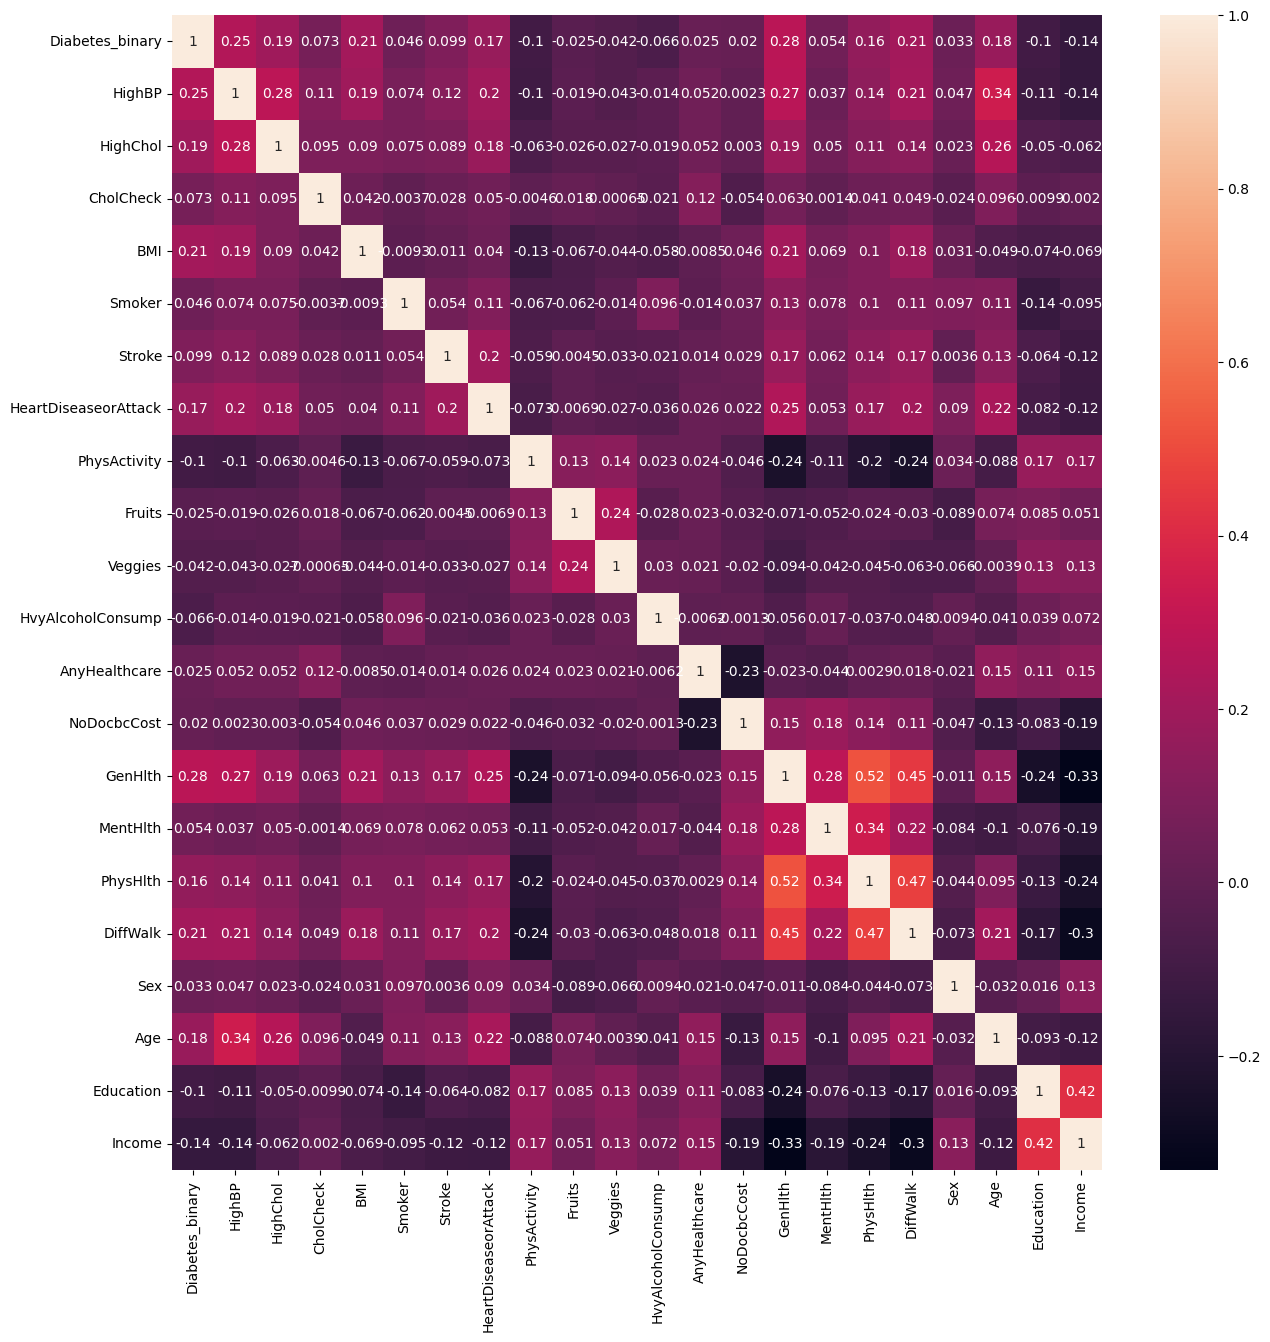

In [70]:
corrMatrix=df.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix,annot=True)
plt.show()

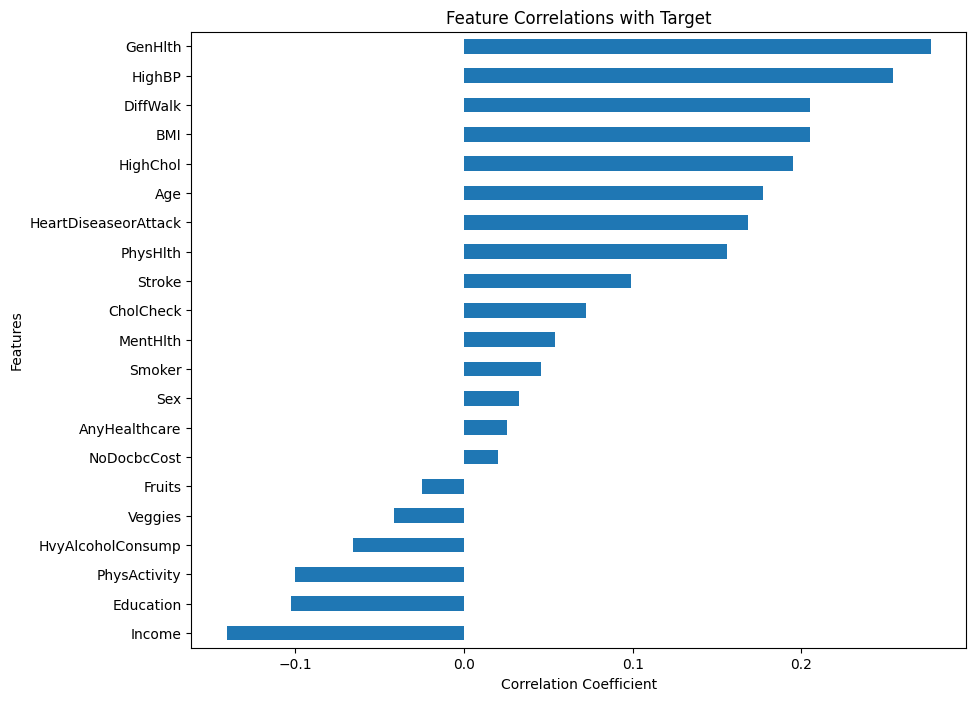

In [71]:
target_corr=corrMatrix['Diabetes_binary'].drop("Diabetes_binary")
sorted_corr=target_corr.sort_values()
plt.figure(figsize=(10, 8))
sorted_corr.plot(kind='barh')
plt.title('Feature Correlations with Target')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [72]:
df=df.drop(["AnyHealthcare","NoDocbcCost"],axis=1)

In [73]:

profile = ProfileReport(df, title="YData Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [74]:
X=df[df.columns[1:]]
Y=df[df.columns[0]]
Y.value_counts()

Diabetes_binary
0.0    194377
1.0     35097
Name: count, dtype: int64

In [75]:
cc=ClusterCentroids(random_state=20)
X,Y=cc.fit_resample(X,Y)

In [76]:
Y.value_counts()

Diabetes_binary
0.0    35097
1.0    35097
Name: count, dtype: int64

In [77]:
df_under_sampled=pd.concat([Y,X],axis=1)

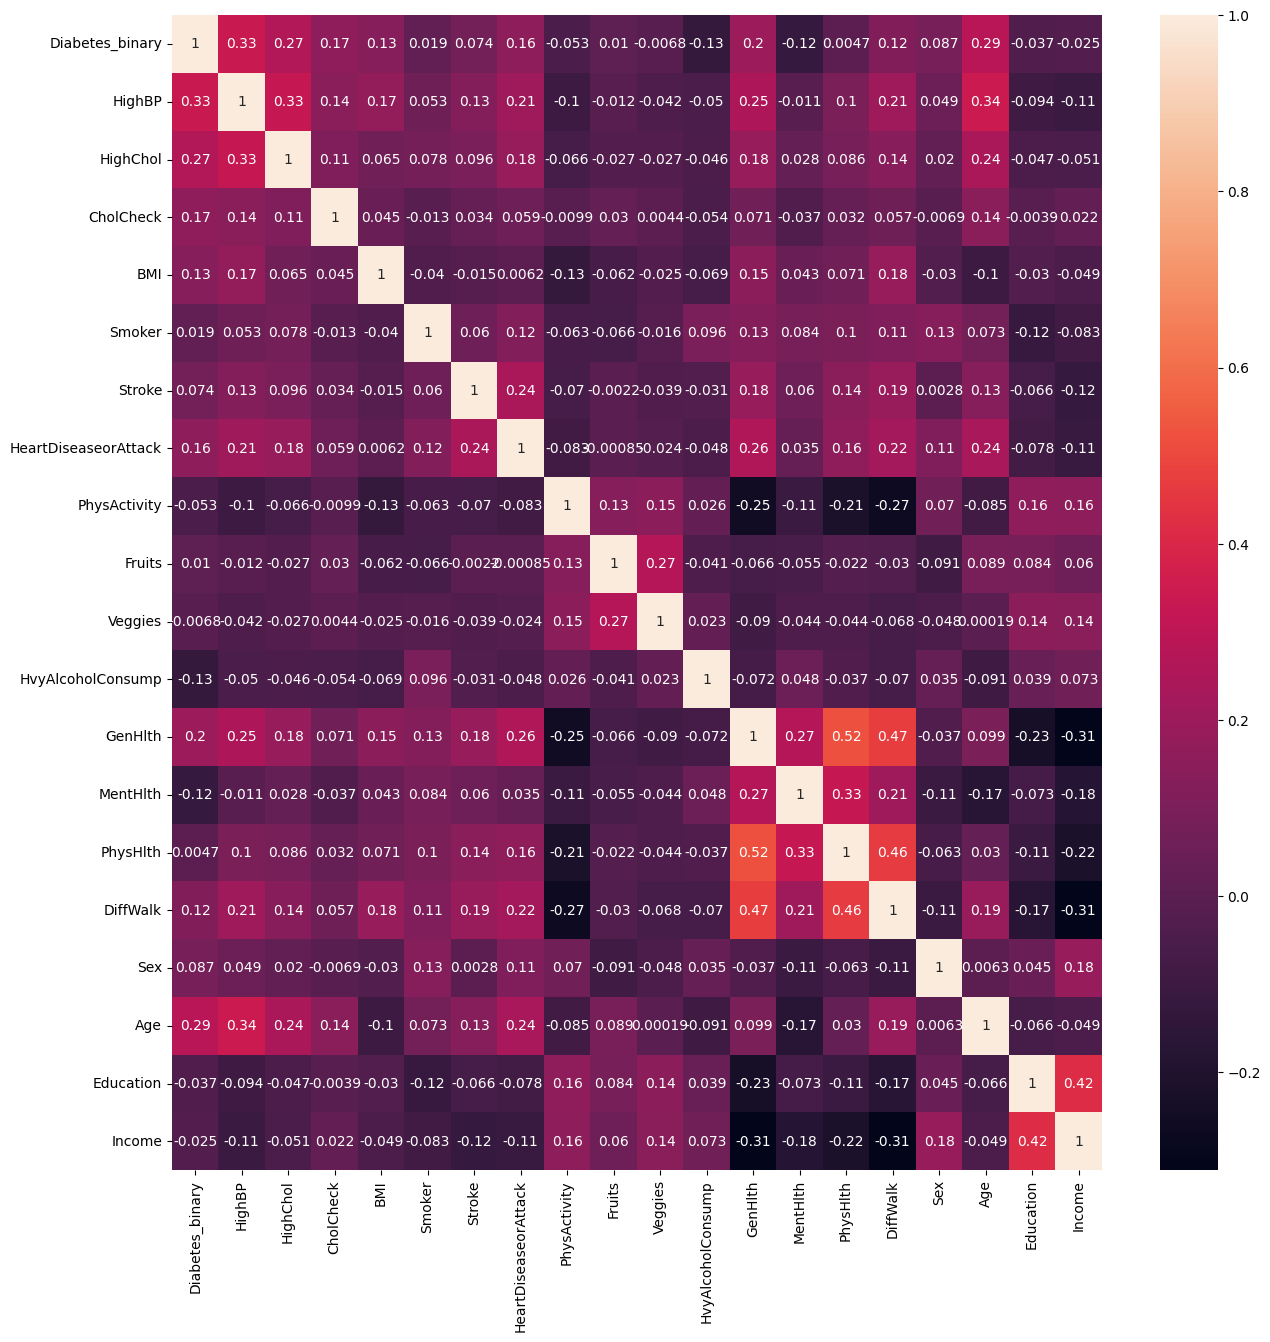

In [78]:
corrMatrix=df_under_sampled.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix,annot=True)
plt.show()

In [79]:
x_train, x_test, y_train, y_test = train_test_split(
    X,  # Feature columns
    Y,   # Target column
    test_size=0.2,       # 20% of data for testing
    random_state=40      # Seed for reproducibility
)

In [80]:
def scale_dataset(x, y, scaler=None):
    if scaler is None:
        scaler = StandardScaler()
        x = scaler.fit_transform(x)
    else:
        x = scaler.transform(x)
    return x, y, scaler

In [81]:
x_train,y_train,scaler=scale_dataset(x_train,y_train)
x_test,y_test,scaler=scale_dataset(x_test,y_test,scaler)

In [82]:
pickle.dump(scaler,open("scaler.pkl","wb"))

In [83]:
x_train.shape

(56155, 19)

# Models

## KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [292]:
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train,y_train)
y_pred_knn=knn_model.predict(x_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82      6942
         1.0       0.79      0.93      0.86      7097

    accuracy                           0.84     14039
   macro avg       0.85      0.84      0.84     14039
weighted avg       0.85      0.84      0.84     14039



In [293]:
grid_params={"n_neighbors":[1,3,5,7,9],"weights":["uniform","distance"],"p":[1,2,3]}
clf=RandomizedSearchCV(KNeighborsClassifier(),grid_params,cv=5)
clf.fit(x_train,y_train)
print("Best cv score= ",clf.best_score_)
print("Best hyperparameters= ",clf.best_params_)
best_model=clf.best_estimator_

#using the model with best parameters

knn_model=best_model
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
print(classification_report(y_test,y_pred))
auc=roc_auc_score(y_test,y_pred)
print("AUC: ",auc)

Best cv score=  0.8314486688629685
Best hyperparameters=  {'weights': 'distance', 'p': 2, 'n_neighbors': 9}
              precision    recall  f1-score   support

         0.0       0.93      0.75      0.83      6942
         1.0       0.79      0.94      0.86      7097

    accuracy                           0.85     14039
   macro avg       0.86      0.84      0.84     14039
weighted avg       0.86      0.85      0.84     14039

AUC:  0.844644327907552


## Naive Bayes

In [294]:
from sklearn.naive_bayes import GaussianNB

In [295]:
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)
y_pred=nb_model.predict(x_test)
print(classification_report(y_test,y_pred))
auc=roc_auc_score(y_test,y_pred)
print("AUC: ",auc)

              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72      6942
         1.0       0.72      0.78      0.75      7097

    accuracy                           0.74     14039
   macro avg       0.74      0.74      0.74     14039
weighted avg       0.74      0.74      0.74     14039

AUC:  0.7366115251038141


## Logistic Regression

In [296]:
from sklearn.linear_model import LogisticRegression

In [297]:
grid_params ={'penalty' : ['l2'],
    'C' : [0.001,0.01,0.1,1,10,100],
    'solver' : ['lbfgs','newton-cg','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }

clf=RandomizedSearchCV(LogisticRegression(),grid_params,cv=5)
clf.fit(x_train,y_train)
result_df=pd.DataFrame(clf.cv_results_)
print("Best score=",clf.best_score_)
print("Best parameters: ",clf.best_params_)

#using best hyperparameters
log_reg_best=clf.best_estimator_
log_reg_best.fit(x_train,y_train)
y_pred=log_reg_best.predict(x_test)
print(classification_report(y_test,y_pred))
auc=roc_auc_score(y_test,y_pred)
print("AUC: ",auc)

Best score= 0.7046389457750868
Best parameters:  {'solver': 'sag', 'penalty': 'l2', 'max_iter': 5000, 'C': 1}
              precision    recall  f1-score   support

         0.0       0.73      0.67      0.70      6942
         1.0       0.70      0.75      0.73      7097

    accuracy                           0.71     14039
   macro avg       0.71      0.71      0.71     14039
weighted avg       0.71      0.71      0.71     14039

AUC:  0.7123576243377615


## SVM

In [298]:
from sklearn.svm import SVC

              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91      6942
         1.0       0.88      0.97      0.92      7097

    accuracy                           0.92     14039
   macro avg       0.92      0.92      0.92     14039
weighted avg       0.92      0.92      0.92     14039



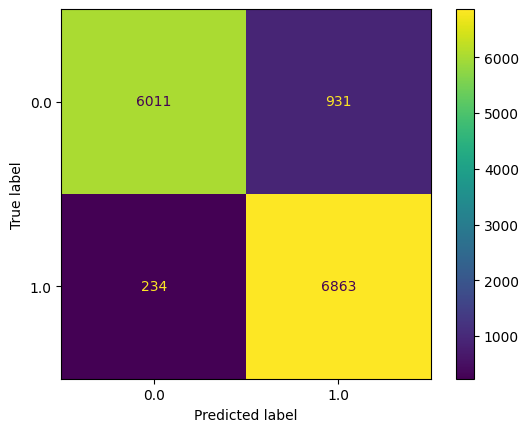

In [299]:
svm_model=SVC()
sv_model=svm_model.fit(x_train,y_train)
y_pred_svm=sv_model.predict(x_test)
print(classification_report(y_test,y_pred_svm))
ConfusionMatrixDisplay.from_estimator(svm_model,x_test,y_test)
plt.show()

In [315]:
pickle.dump(sv_model,open("svm_model.pkl","wb"))

In [ ]:
grid_params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','poly']}
clf=RandomizedSearchCV(SVC(),grid_params,cv=5)
clf.fit(x_train,y_train)
result_df=pd.DataFrame(clf.cv_results_)
print("Best score=",clf.best_score_)
print("Best parameters: ",clf.best_params_)

#using best hyperparameters
svm_best=clf.best_estimator_
svm_best.fit(x_train,y_train)
y_pred=svm_best.predict(x_test)
print(classification_report(y_test,y_pred))
auc=roc_auc_score(y_test,y_pred)
print("AUC: ",auc)

## Deicision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier


In [25]:
grid_params={
    "criterion":["gini","entropy","log_loss"],
    "splitter":["best","random"],
    "max_depth":[None,1,2,3,4,5,7],
    "max_features":["sqrt","log2",0.5,1,3,5,None]
}
clf=RandomizedSearchCV(DecisionTreeClassifier(),grid_params,cv=5)
clf.fit(x_train,y_train)
result_df=pd.DataFrame(clf.cv_results_)
print("Best score=",clf.best_score_)
print("Best parameters: ",clf.best_params_)

#using best hyperparameterd
dt_best=clf.best_estimator_
dt_best.fit(x_train,y_train)
y_pred=dt_best.predict(x_test)
print(classification_report(y_test,y_pred))
auc=roc_auc_score(y_test,y_pred)
print("AUC: ",auc)

Best score= 0.8385361944617575
Best parameters:  {'splitter': 'best', 'max_features': None, 'max_depth': 4, 'criterion': 'entropy'}
              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82      6942
         1.0       0.78      0.95      0.86      7097

    accuracy                           0.84     14039
   macro avg       0.86      0.84      0.84     14039
weighted avg       0.86      0.84      0.84     14039

AUC:  0.8392795098029784


## Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [89]:
rf_model=RandomForestClassifier(n_estimators=200)
rf_model.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92      6942
         1.0       0.90      0.95      0.93      7097

    accuracy                           0.92     14039
   macro avg       0.92      0.92      0.92     14039
weighted avg       0.92      0.92      0.92     14039



In [92]:
grid_params={
    "n_estimators":[50,100,200],
    "criterion":["gini","entropy","log_loss"],
    "max_features":["sqrt","log2",0.5,1,3,5,None],
    "n_jobs":[-1]
}
clf=RandomizedSearchCV(RandomForestClassifier(),grid_params,cv=5)
clf.fit(x_train,y_train)
result_df=pd.DataFrame(clf.cv_results_)
print("Best score=",clf.best_score_)
print("Best parameters: ",clf.best_params_)

#using best hyperparameters
rf_best=clf.best_estimator_
rf_best.fit(x_train,y_train)
y_pred=rf_best.predict(x_test)
print(classification_report(y_test,y_pred))
auc=roc_auc_score(y_test,y_pred)
print("AUC: ",auc)

Best score= 0.9195441189564597
Best parameters:  {'n_jobs': -1, 'n_estimators': 200, 'max_features': 'log2', 'criterion': 'log_loss'}
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92      6942
         1.0       0.90      0.96      0.93      7097

    accuracy                           0.92     14039
   macro avg       0.92      0.92      0.92     14039
weighted avg       0.92      0.92      0.92     14039

AUC:  0.9217497770431199


## Neural Network

In [24]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras_tuner import BayesianOptimization
from keras_tuner import SklearnTuner


In [25]:
import keras_tuner as kt
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

In [27]:
def build_model(hp):
    nn_model = Sequential()
    
    # Determine the number of layers from hyperparameter search space
    count=0
    for i in range(hp.Int('num_layers', min_value=1, max_value=3)):
        if count == 0:
            nn_model.add(Dense(units=19,
                               activation='relu',
                               input_dim=x_train.shape[1]))  # Assuming x_train is defined somewhere
        else:
            nn_model.add(Dense(units=hp.Choice('num_nodes_' + str(i), values=[4,8,12,16]),
                               activation='relu'))
            nn_model.add(Dropout(0.5))
        count+=1

    nn_model.add(Dense(units=1, activation='sigmoid'))
    
    nn_model.compile(optimizer=hp.Choice('optimizer',values=["RMSprop","Adam"]),loss="binary_crossentropy",metrics=["accuracy"])
    
    return nn_model


In [80]:
#after tuning, using best result
nn_model=Sequential()
nn_model.add(Dense(units=19,activation="relu", input_dim=x_train.shape[1]))
nn_model.add(Dense(units=16,activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(units=16,activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(units=1,activation='sigmoid'))
nn_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics='accuracy')
history=nn_model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
1755/1755 [==============================] - 6s 3ms/step - loss: 0.5874 - accuracy: 0.6781 - val_loss: 0.4701 - val_accuracy: 0.7832
Epoch 2/30
1755/1755 [==============================] - 5s 3ms/step - loss: 0.4681 - accuracy: 0.7866 - val_loss: 0.3584 - val_accuracy: 0.8436
Epoch 3/30
1755/1755 [==============================] - 5s 3ms/step - loss: 0.3817 - accuracy: 0.8365 - val_loss: 0.2946 - val_accuracy: 0.8723
Epoch 4/30
1755/1755 [==============================] - 6s 3ms/step - loss: 0.3289 - accuracy: 0.8586 - val_loss: 0.2692 - val_accuracy: 0.8835
Epoch 5/30
1755/1755 [==============================] - 5s 3ms/step - loss: 0.3092 - accuracy: 0.8656 - val_loss: 0.2648 - val_accuracy: 0.8849
Epoch 6/30
1755/1755 [==============================] - 6s 3ms/step - loss: 0.2940 - accuracy: 0.8717 - val_loss: 0.2517 - val_accuracy: 0.8895
Epoch 7/30
1755/1755 [==============================] - 5s 3ms/step - loss: 0.2843 - accuracy: 0.8764 - val_loss: 0.2431 - val_accuracy:

In [81]:
nn_model.save("nn_model.h5")

In [199]:
pickle.dump(nn_model,open("nn-model.pkl","wb"))

INFO:tensorflow:Assets written to: ram://111494f0-9a75-4da2-bc46-cf97accb039b/assets


In [28]:
tuner=kt.GridSearch(build_model, objective= 'val_accuracy',directory="GridSearch",project_name="T5")
tuner.search(x_train,y_train,epochs=5, validation_data=(x_test,y_test))

Reloading Tuner from GridSearch\T5\tuner0.json


In [29]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)

# Iterate over the best hyperparameters found
for idx, hyperparams in enumerate(best_hps):
    print(f"Hyperparameters for trial {idx + 1}:")
    for param, value in hyperparams.values.items():
        print(f"{param}: {value}")
    print("\n")

Hyperparameters for trial 1:
num_layers: 2
optimizer: RMSprop
num_nodes_1: 16




In [53]:
best_nn_model=tuner.get_best_models(num_models=1)[0]
history=best_nn_model.fit(x_train,y_train,epochs=30,initial_epoch=6,validation_data=(x_test,y_test))


Epoch 7/30
1755/1755 [==============================] - 6s 3ms/step - loss: 0.3096 - accuracy: 0.8619 - val_loss: 0.2501 - val_accuracy: 0.8865
Epoch 8/30
1755/1755 [==============================] - 6s 3ms/step - loss: 0.2924 - accuracy: 0.8665 - val_loss: 0.2458 - val_accuracy: 0.8888
Epoch 9/30
1755/1755 [==============================] - 6s 3ms/step - loss: 0.2855 - accuracy: 0.8682 - val_loss: 0.2329 - val_accuracy: 0.8960
Epoch 10/30
1755/1755 [==============================] - 6s 3ms/step - loss: 0.2785 - accuracy: 0.8711 - val_loss: 0.2254 - val_accuracy: 0.8987
Epoch 11/30
1755/1755 [==============================] - 6s 3ms/step - loss: 0.2749 - accuracy: 0.8719 - val_loss: 0.2271 - val_accuracy: 0.8962
Epoch 12/30
1755/1755 [==============================] - 6s 3ms/step - loss: 0.2717 - accuracy: 0.8712 - val_loss: 0.2212 - val_accuracy: 0.8961
Epoch 13/30
1755/1755 [==============================] - 6s 3ms/step - loss: 0.2698 - accuracy: 0.8750 - val_loss: 0.2296 - val_accur

KeyboardInterrupt: 

In [82]:
nn_model.evaluate(x_test,y_test)

439/439 [==============================] - 1s 2ms/step - loss: 0.2100 - accuracy: 0.9068


[0.21003836393356323, 0.9068309664726257]

In [83]:
y_pred_nn=nn_model.predict(x_test)

439/439 [==============================] - 0s 934us/step


In [84]:
y_pred_nn_binary=(y_pred_nn>0.5).astype(int)

In [85]:
auc=roc_auc_score(y_test,y_pred_nn_binary)
print("AUC: ",auc)

AUC:  0.9062360112800004


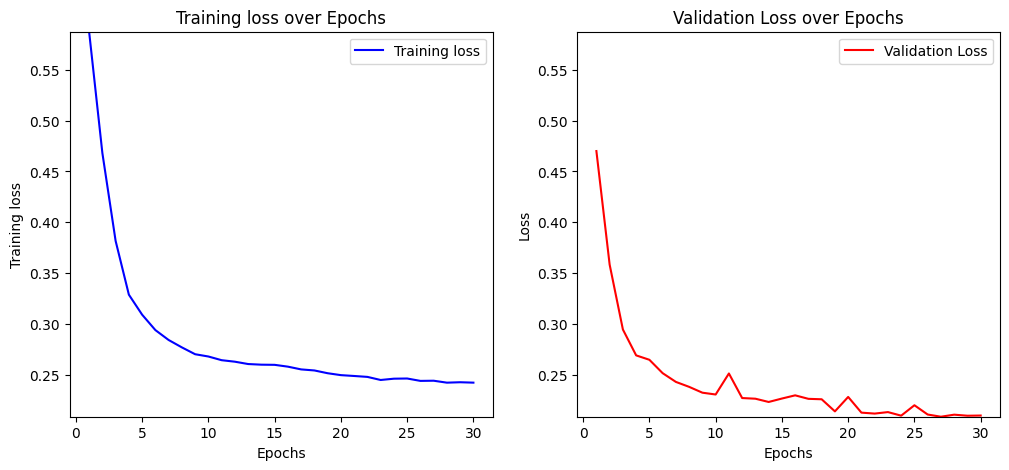

In [86]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

min_val = min(min(loss), min(val_loss))
max_val = max(max(loss), max(val_loss))


# Plot validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.ylim(min_val, max_val)
plt.legend()

# Plot validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(min_val, max_val)
plt.legend()

plt.show()

In [87]:
print(classification_report(y_test,y_pred_nn_binary))

              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90      6942
         1.0       0.87      0.96      0.91      7097

    accuracy                           0.91     14039
   macro avg       0.91      0.91      0.91     14039
weighted avg       0.91      0.91      0.91     14039



## XG Boost

In [85]:
import xgboost
from xgboost import XGBClassifier

In [86]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [93]:
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

C:\Users\subha\miniconda3\envs\tf\lib\site-packages\xgboost\core.py:158: UserWarning: [23:08:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [94]:
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}


In [95]:
xgb_best=grid_search.best_estimator_
y_pred_xgb=xgb_best.predict(x_test)

In [96]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      6942
         1.0       0.92      0.96      0.94      7097

    accuracy                           0.93     14039
   macro avg       0.93      0.93      0.93     14039
weighted avg       0.93      0.93      0.93     14039



In [97]:
print(f"AUC score: {roc_auc_score(y_test,y_pred_xgb)}")

AUC score: 0.9331580976895583


In [98]:
pickle.dump(xgb_best,open("xgBoost.pkl","wb"))